In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

In [2]:
ls

Fig_grape_crab_vs_pop.pdf
Fig_grape_vs_pop.pdf
LIN_qutip_opt_results_timeslices_10.hdf5
LIN_qutip_opt_results_timeslices_2.hdf5
LIN_qutip_opt_results_timeslices_4.hdf5
LIN_qutip_opt_results_timeslices_8.hdf5
plots.ipynb
Quantum_optimal_control_GRAPE_methods-Copy2.ipynb
Quantum_optimal_control_GRAPE_methods-Copy4.ipynb
Quantum_optimal_control_GRAPE_methods-Copy8.ipynb
Quantum_optimal_control_GRAPE_methods.ipynb
results.hdf5
results_PiecewiseConst.hdf5
RND_qutip_opt_results_timeslices_10.hdf5
RND_qutip_opt_results_timeslices_2.hdf5
RND_qutip_opt_results_timeslices_4.hdf5
RND_qutip_opt_results_timeslices_8.hdf5
SINE_qutip_opt_results_timeslices_10.hdf5
SINE_qutip_opt_results_timeslices_2.hdf5
SINE_qutip_opt_results_timeslices_4.hdf5
SINE_qutip_opt_results_timeslices_8.hdf5
ZERO_qutip_opt_results_timeslices_10.hdf5
ZERO_qutip_opt_results_timeslices_2.hdf5
ZERO_qutip_opt_results_timeslices_4.hdf5
ZERO_qutip_opt_results_timeslices_8.hdf5


In [3]:
# Load data
        
#timeslices = [2, 4, 8, 10]
timeslices = [2, 4, 8, 10,]

cy_grape_fid_error = []
pulseoptim_fid_error = []

for n_ts in timeslices:
    with h5py.File(f"ZERO_qutip_opt_results_timeslices_{n_ts}.hdf5", 'r') as f:
        cy_grape_fid_error.append(
            f["pulseoptim_fid_error"][...]
        )
        pulseoptim_fid_error.append(
            f["cy_grape_fid_error"][...]
        )

with h5py.File('../results_PiecewiseConst.hdf5', 'r') as f:
    pop_fid_error = 1 - f['f_PSU'][...]

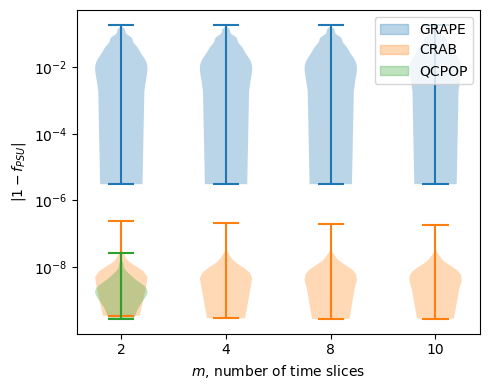

In [4]:
import matplotlib.patches as mpatches

plt.figure(figsize=(5, 4))

labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

# GRAPE
add_label(plt.violinplot([np.abs(_)  for _ in cy_grape_fid_error]), "GRAPE")    

add_label(plt.violinplot([np.abs(_)  for _ in pulseoptim_fid_error]), "CRAB")

add_label(plt.violinplot(pop_fid_error), "QCPOP")

plt.yscale('log')

plt.xticks(range(1, len(timeslices) + 1), timeslices )
plt.xlabel("$m$, number of time slices")

plt.ylabel("$|1 - f_{PSU}|$")

plt.legend(*zip(*labels), loc=1)

plt.tight_layout()

plt.savefig("Fig_grape_crab_vs_pop.pdf")

plt.show()